# Forecast the Airlines Passengers data set. Prepare a document for each model explaining. how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sharda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_excel("Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.shape

(96, 2)

In [4]:
# We will extract month values and Year values separately from 'Quarter column'
df['month'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

In [5]:
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,1,1995
1,1995-02-01,118,2,1995
2,1995-03-01,132,3,1995
3,1995-04-01,129,4,1995
4,1995-05-01,121,5,1995


In [6]:
# Getting dummy variables for months
month_Dummies = pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,month_Dummies],axis = 1)
df.head()

,Month,Passengers,month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,1,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,1995,0,0,0,0,1,0,0,0,0,0,0,0


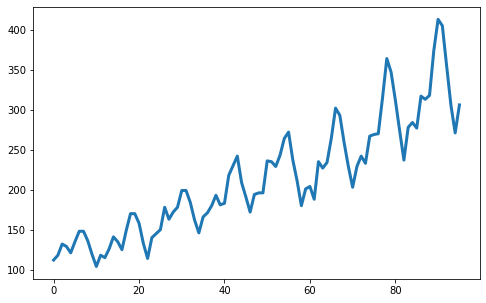

In [7]:
# Lineplot for Air Passengers
plt.figure(figsize=(8,5))
plt.plot(df['Passengers'], linewidth=3)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

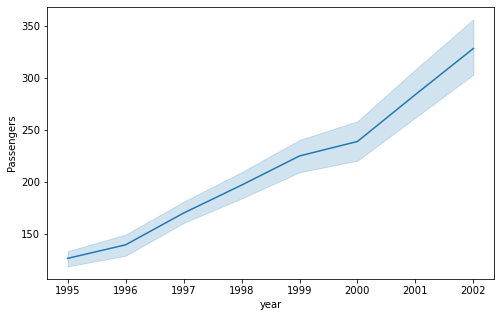

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x="year",y="Passengers",data=df)

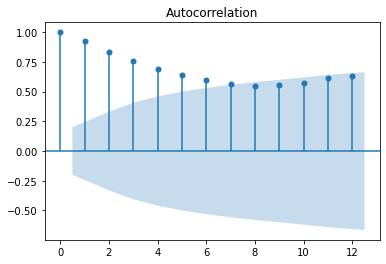

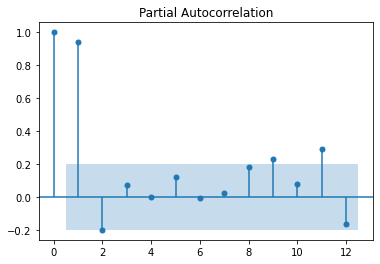

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

#### Data Driven Forecasting Methods

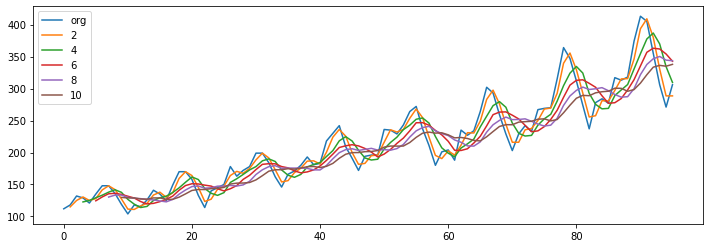

In [10]:
# Moving Average Method
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,12,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

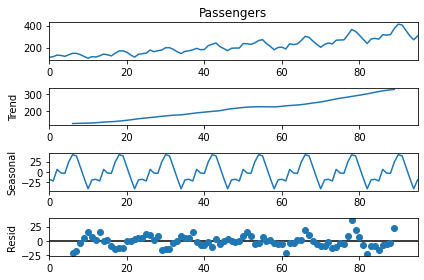

In [11]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [12]:
# Evaluation Metric RMSE
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [13]:
# Model based Forecasting Methods
# Data preprocessing for models
df["t"] = np.arange(1,97)
df["t_squared"] = df["t"]*df["t"]

df["log_Passengers"] = np.log(df["Passengers"])

df.head()

,Month,Passengers,month,year,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_Passengers
0,1995-01-01,112,1,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [14]:
column_indices = [4,5,6,7,8,9,10,11,12,13,14,15]
new_names = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
old_names = df.columns[column_indices]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df.head()

,Month,Passengers,month,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,t,t_squared,log_Passengers
0,1995-01-01,112,1,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [15]:
# Splitting data into Train and Test
Train = df.head(86)
Test = df.tail(10)

In [16]:
Train.head()

,Month,Passengers,month,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,t,t_squared,log_Passengers
0,1995-01-01,112,1,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [17]:
Test.head()

,Month,Passengers,month,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,t,t_squared,log_Passengers
86,2002-03-01,317,3,2002,0,0,1,0,0,0,0,0,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,4,2002,0,0,0,1,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,5,2002,0,0,0,0,1,0,0,0,0,0,0,0,89,7921,5.762051
89,2002-06-01,374,6,2002,0,0,0,0,0,1,0,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,7,2002,0,0,0,0,0,0,1,0,0,0,0,0,91,8281,6.023448


In [18]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test['Passengers'], pred_linear)
rmse_linear

58.64314972778256

In [19]:
# Exponential Model
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_exp

49.90312334789315

In [20]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad = RMSE(Test['Passengers'], pred_Quad)
rmse_quad

53.91436357852567

In [21]:
# Additive Seasonality model
add_sea = smf.ols('Passengers~m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]))
rmse_add_sea = RMSE(Test['Passengers'], pred_add_sea)
rmse_add_sea

136.79010436819325

In [23]:
# Additive seasonality with linear trend
add_sea_lin = smf.ols('Passengers~t+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['t','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]))
rmse_add_sea_lin = RMSE(Test['Passengers'], pred_add_sea_lin)
rmse_add_sea_lin 

38.10357859002937

In [24]:
# Additive Seasonality Quadratic model
add_sea_Quad = smf.ols('Passengers~t+t_squared+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Passengers'], pred_add_sea_quad)
rmse_add_sea_quad 

29.1045498992376

In [25]:
# Multiplicative Seasonality model
Mul_sea = smf.ols('log_Passengers~m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Passengers'], np.exp(pred_Mult_sea))
rmse_Mul_sea

144.38493549461444

In [30]:
# Multiplicative seasonality with quadratic trend
Mul_Add_sea = smf.ols('log_Passengers~t+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea .predict(Test[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','t','t_squared']]))
rmse_Mul_add_sea = RMSE(Test['Passengers'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

11.26495833043119

In [27]:
list = [['Linear Mode',rmse_linear], ['Exp model',rmse_exp],
        ['Quad model',rmse_quad], ['add seasonality',rmse_add_sea],
        ['Linear add seasonality',rmse_add_sea_lin], ['Quad add seasonality',rmse_add_sea_quad],
        ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_add_sea]]

In [28]:
data= pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
data

,Model,RMSE_Value
0,Linear Mode,58.643150
1,Exp model,49.903123
2,Quad model,53.914364
3,add seasonality,136.790104
4,Linear add seasonality,38.103579
5,Quad add seasonality,29.104550
6,Mult Seasonality,144.384935
7,Mult add seasonality,11.264958


### Building final model with least RMSE value

In [29]:
df.head()

,Month,Passengers,month,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,t,t_squared,log_Passengers
0,1995-01-01,112,1,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [31]:
final_model = smf.ols('Passengers~t+t_squared+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12',data=df).fit()
pred_final = pd.Series(final_model.predict(df[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','t','t_squared']]))
rmse_final_model = RMSE(df['Passengers'], pred_final)
rmse_final_model

13.484378376693773

In [32]:
pred_df = pd.DataFrame({'Actual' : df.Passengers, 'Predicted' : pred_final})
pred_df.head()

,Actual,Predicted
0,112,101.802790
1,118,100.717631
2,132,128.632471
3,129,121.797312
4,121,120.837153
